# CS671 Final Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import seaborn as sns
import time
import datetime as dt

from yahoo_fin.stock_info import get_data
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from warnings import filterwarnings
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
filterwarnings(action='ignore')

In [2]:
#Downloading the using Yahoo finance API
ticker_list=['SPGI', 'VZ', 'TSLA', 'AAPL', 'XOM', 'UNH', 'WM', 'BRK-B', 'AMZN', 'UPS', 'NEE']
start='2019/01/01'
end='2022/12/01'

data = {}
for ticker in ticker_list:
    data[ticker] = get_data(ticker, start_date = start, end_date = end)
data

{'SPGI':                   open        high         low       close    adjclose  \
 2019-01-02  169.270004  171.270004  167.000000  169.850006  164.012054   
 2019-01-03  169.289993  169.399994  163.990005  164.369995  158.720413   
 2019-01-04  167.029999  172.919998  166.639999  172.259995  166.339203   
 2019-01-07  171.910004  175.320007  171.910004  173.639999  167.671799   
 2019-01-08  174.759995  175.250000  173.050003  175.229996  169.207123   
 ...                ...         ...         ...         ...         ...   
 2022-11-23  353.019989  362.049988  351.119995  358.269989  357.419983   
 2022-11-25  355.049988  358.309998  352.529999  357.910004  357.910004   
 2022-11-28  354.459991  357.339996  349.929993  351.010010  351.010010   
 2022-11-29  350.720001  351.730011  346.390015  347.140015  347.140015   
 2022-11-30  347.130005  353.380005  340.109985  352.799988  352.799988   
 
              volume ticker  
 2019-01-02  1362200   SPGI  
 2019-01-03  1569500   SPGI  


In [3]:
#Descriptive data analysis
SP_Global = data['SPGI']
Verizon = data['VZ']
Tesla = data['TSLA']
Apple = data['AAPL']
Exxon = data['XOM']
UHealth = data['UNH']
Waste = data['WM']
Berkshire = data['BRK-B']
Amazon = data['AMZN']
UPS = data['UPS']
Next = data['NEE']

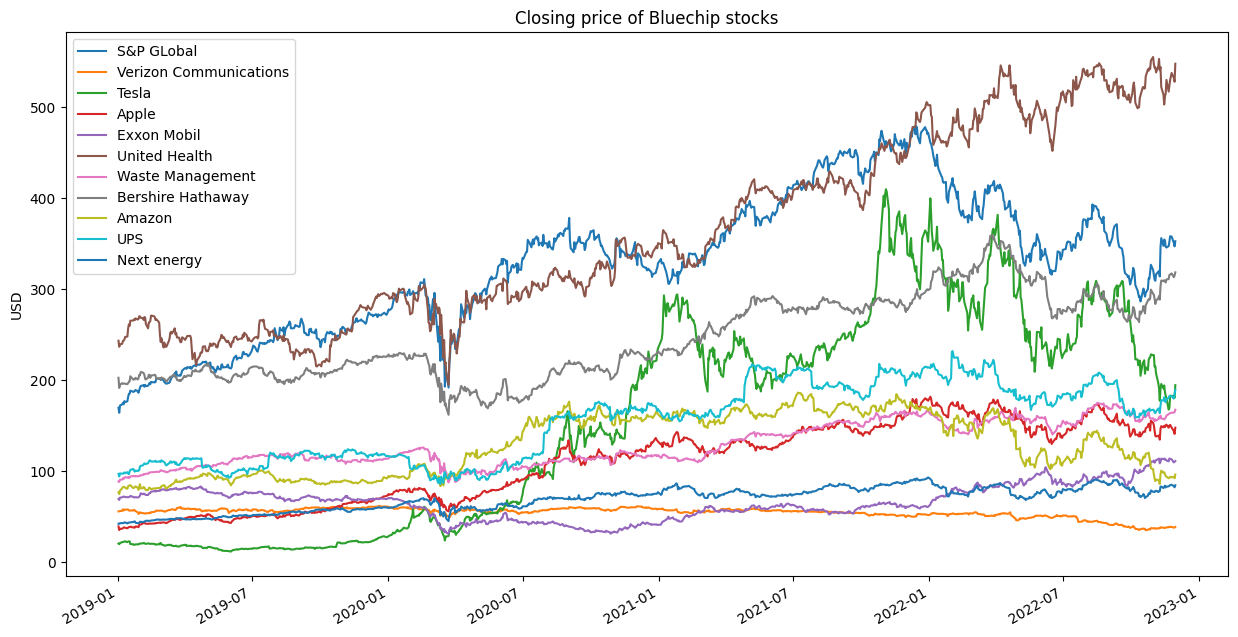

In [4]:
plt.figure(figsize=(15,8))
(SP_Global['close']).plot(label='S&P GLobal')
(Verizon['close']).plot(label='Verizon Communications')
(Tesla['close']).plot(label='Tesla')
(Apple['close']).plot(label='Apple')
(Exxon['close']).plot(label='Exxon Mobil')
(UHealth['close']).plot(label='United Health')
(Waste['close']).plot(label='Waste Management')
(Berkshire['close']).plot(label='Bershire Hathaway')
(Amazon['close']).plot(label='Amazon')
(UPS['close']).plot(label='UPS')
(Next['close']).plot(label='Next energy')


plt.legend()
plt.ylabel('USD')
plt.title('Closing price of Bluechip stocks')
plt.show()

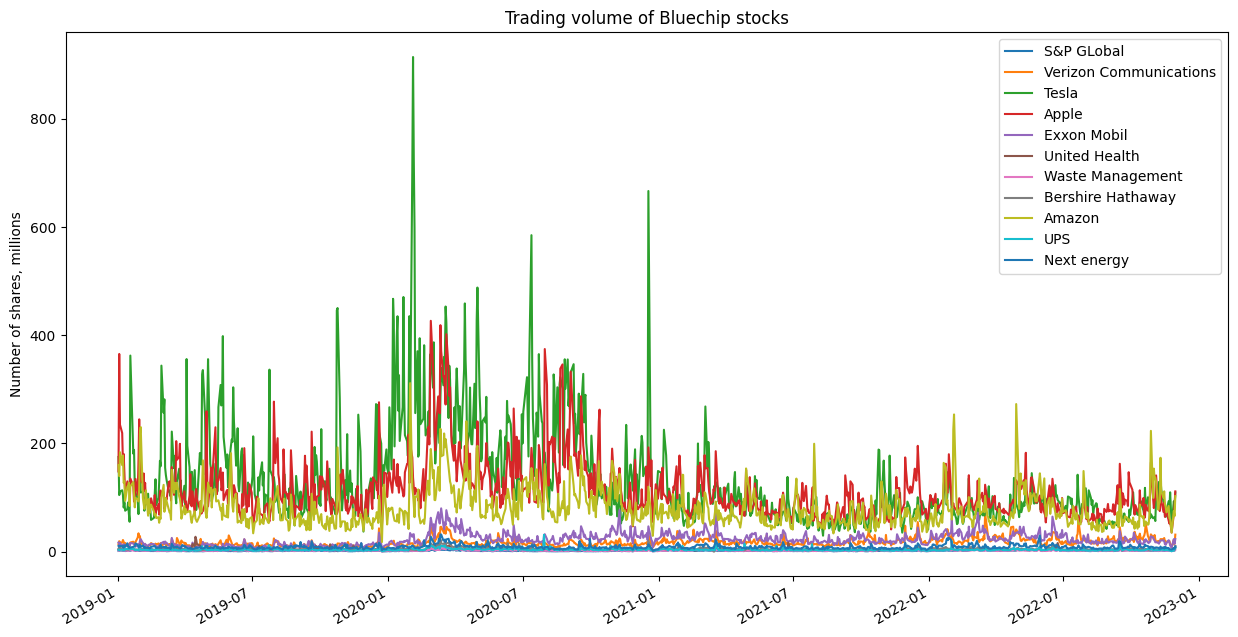

In [5]:
plt.figure(figsize=(15,8))
(SP_Global['volume']/1000000).plot(label='S&P GLobal')
(Verizon['volume']/1000000).plot(label='Verizon Communications')
(Tesla['volume']/1000000).plot(label='Tesla')
(Apple['volume']/1000000).plot(label='Apple')
(Exxon['volume']/1000000).plot(label='Exxon Mobil')
(UHealth['volume']/1000000).plot(label='United Health')
(Waste['volume']/1000000).plot(label='Waste Management')
(Berkshire['volume']/1000000).plot(label='Bershire Hathaway')
(Amazon['volume']/1000000).plot(label='Amazon')
(UPS['volume']/1000000).plot(label='UPS')
(Next['volume']/1000000).plot(label='Next energy')



plt.legend()
plt.ylabel('Number of shares, millions')
plt.title('Trading volume of Bluechip stocks')
plt.show()

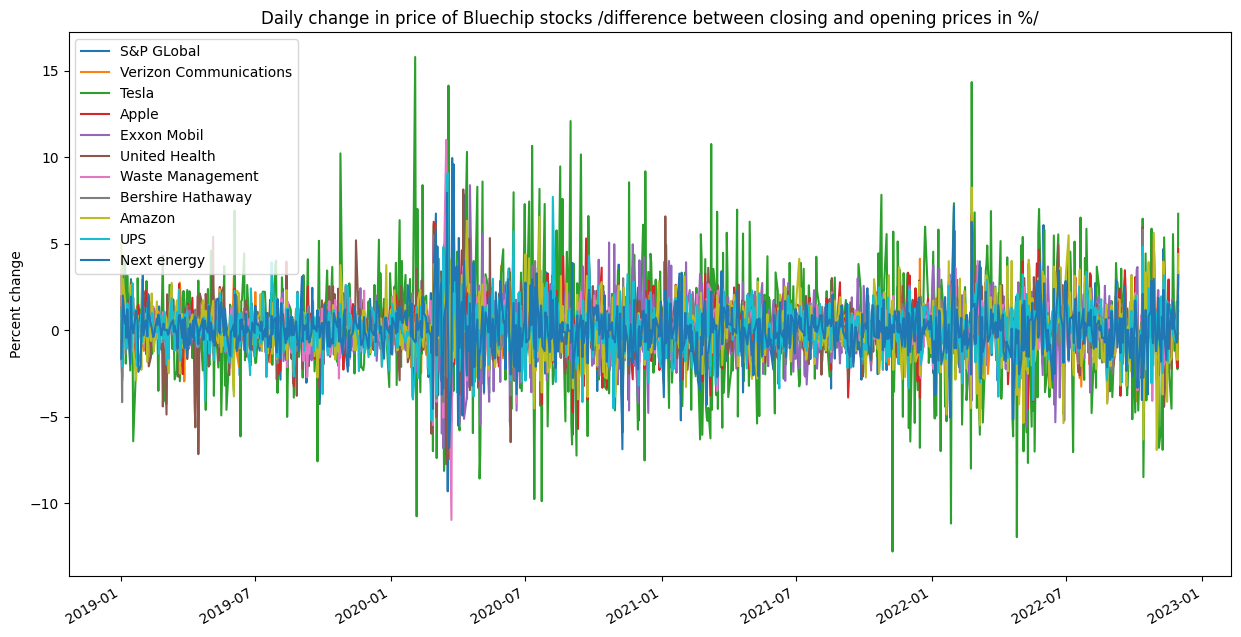

In [6]:
plt.figure(figsize=(15,8))
((SP_Global['close']-SP_Global['open'])/SP_Global['open']*100).plot(label='S&P GLobal')
((Verizon['close']-Verizon['open'])/Verizon['open']*100).plot(label='Verizon Communications')
((Tesla['close']-Tesla['open'])/Tesla['open']*100).plot(label='Tesla')
((Apple['close']-Apple['open'])/Apple['open']*100).plot(label='Apple')
((Exxon['close']-Exxon['open'])/Exxon['open']*100).plot(label='Exxon Mobil')
((UHealth['close']-UHealth['open'])/UHealth['open']*100).plot(label='United Health')
((Waste['close']-Waste['open'])/Waste['open']*100).plot(label='Waste Management')
((Berkshire['close']-Berkshire['open'])/Berkshire['open']*100).plot(label='Bershire Hathaway')
((Amazon['close']-Amazon['open'])/Amazon['open']*100).plot(label='Amazon')
((UPS['close']-UPS['open'])/UPS['open']*100).plot(label='UPS')
((Next['close']-Next['open'])/Next['open']*100).plot(label='Next energy')


plt.legend()
plt.ylabel('Percent change')
plt.title('Daily change in price of Bluechip stocks /difference between closing and opening prices in %/')
plt.show()

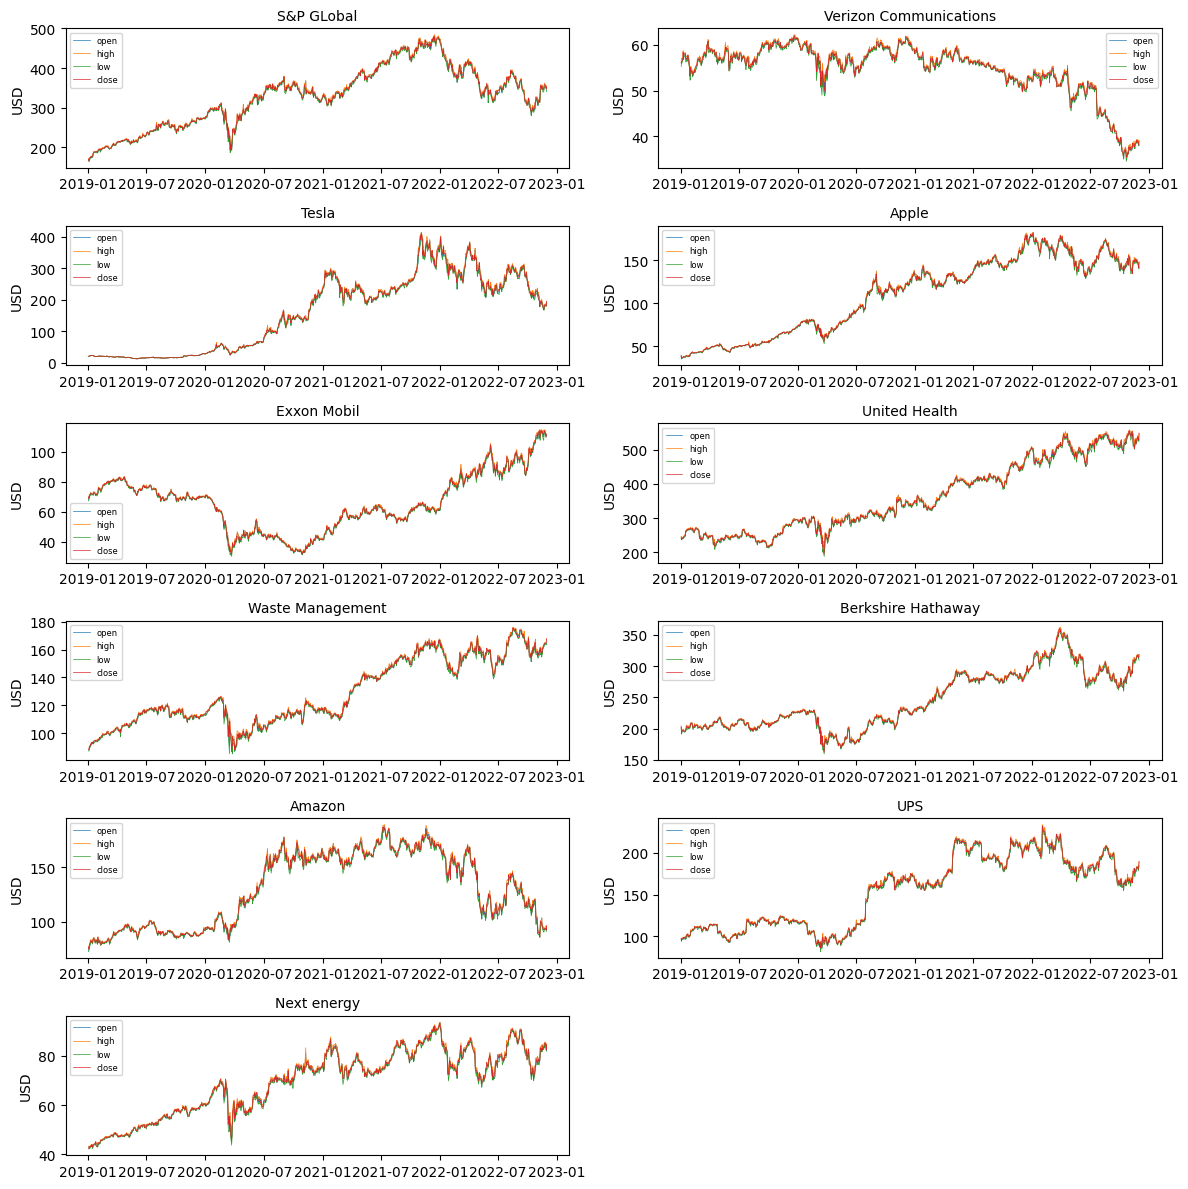

In [7]:
#Plot of indicators by individual stocks
plt.figure(figsize=(12, 12))
plt.subplot(6,2,1)
plt.plot(SP_Global[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('S&P GLobal', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,2)
plt.plot(Verizon[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Verizon Communications', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,3)
plt.plot(Tesla[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Tesla', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,4)
plt.plot(Apple[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Apple', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,5)
plt.plot(Exxon[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Exxon Mobil', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,6)
plt.plot(UHealth[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('United Health', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,7)
plt.plot(Waste[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Waste Management', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,8)
plt.plot(Berkshire[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Berkshire Hathaway', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,9)
plt.plot(Amazon[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Amazon', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,10)
plt.plot(UPS[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('UPS', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.subplot(6,2,11)
plt.plot(Next[['open','high','low','close']], linewidth = '0.5')
plt.ylabel('USD')
plt.title('Next energy', fontsize=10)
plt.legend(['open','high','low','close'], fontsize=6)

plt.tight_layout()
plt.show()

In [8]:
data_all = pd.concat([SP_Global, Verizon, Tesla, Apple, Exxon, UHealth, Waste, Berkshire, Amazon, UPS, Next])

In [9]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10857 entries, 2019-01-02 to 2022-11-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      10857 non-null  float64
 1   high      10857 non-null  float64
 2   low       10857 non-null  float64
 3   close     10857 non-null  float64
 4   adjclose  10857 non-null  float64
 5   volume    10857 non-null  int64  
 6   ticker    10857 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 678.6+ KB


In [10]:
print(data_all.isnull().sum())
data_all.to_csv('Bluechip Stocks Data.csv',index= False)
data_all

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64


,open,high,low,close,adjclose,volume,ticker
2019-01-02,169.270004,171.270004,167.000000,169.850006,164.012054,1362200,SPGI
2019-01-03,169.289993,169.399994,163.990005,164.369995,158.720413,1569500,SPGI
2019-01-04,167.029999,172.919998,166.639999,172.259995,166.339203,1946800,SPGI
2019-01-07,171.910004,175.320007,171.910004,173.639999,167.671799,1820500,SPGI
2019-01-08,174.759995,175.250000,173.050003,175.229996,169.207123,1426700,SPGI
...,...,...,...,...,...,...,...
2022-11-23,83.540001,85.000000,83.440002,84.919998,84.919998,4259700,NEE
2022-11-25,85.269997,85.800003,85.129997,85.339996,85.339996,3622200,NEE
2022-11-28,84.339996,85.010002,83.339996,83.730003,83.730003,6464200,NEE
2022-11-29,82.910004,83.129997,81.980003,82.489998,82.489998,5398200,NEE


In [11]:
#Creating technical analysis data using ta library

data_ta = add_all_ta_features(data_all, open="open", high="high", low="low", close="close", volume="volume", fillna=True)
data_ta.to_csv('Bluechip Stocks Data_TA.csv',index= False)
print('In total there are', data_ta.shape[1:], 'indicators including the technical indicators.')

In total there are (93,) indicators including the technical indicators.


In [12]:
data_ta.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10857 entries, 2019-01-02 to 2022-11-30
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open                       10857 non-null  float64
 1   high                       10857 non-null  float64
 2   low                        10857 non-null  float64
 3   close                      10857 non-null  float64
 4   adjclose                   10857 non-null  float64
 5   volume                     10857 non-null  int64  
 6   ticker                     10857 non-null  object 
 7   volume_adi                 10857 non-null  float64
 8   volume_obv                 10857 non-null  int64  
 9   volume_cmf                 10857 non-null  float64
 10  volume_fi                  10857 non-null  float64
 11  volume_em                  10857 non-null  float64
 12  volume_sma_em              10857 non-null  float64
 13  volume_vpt                 10

In [13]:
y = data_ta.filter(like='close').drop('adjclose', axis=1)
X_raw = data_ta.drop(y.columns, axis=1)

In [14]:
#Correlation of the features
cor_matrix=X_raw.corr(numeric_only=True).abs()
cor_matrix

,open,high,low,adjclose,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
open,1.000000,0.999798,0.999759,0.999037,0.262325,0.055334,0.049701,0.005115,0.043618,0.011893,...,0.157633,0.164441,0.000043,0.031842,0.038817,0.003590,0.997193,0.008360,0.014907,0.999573
high,0.999798,1.000000,0.999649,0.999293,0.258066,0.056441,0.050222,0.005914,0.045674,0.016472,...,0.157170,0.163904,0.000163,0.028771,0.036396,0.005762,0.997317,0.014274,0.019005,0.999779
low,0.999759,0.999649,1.000000,0.999181,0.267141,0.054041,0.049118,0.007475,0.045993,0.018036,...,0.158296,0.164554,0.002138,0.034969,0.040864,0.000582,0.996792,0.014880,0.019689,0.999783
adjclose,0.999037,0.999293,0.999181,1.000000,0.249106,0.055704,0.048859,0.008071,0.048191,0.019836,...,0.158825,0.165182,0.001853,0.026554,0.032261,0.002785,0.996560,0.021373,0.024315,0.999454
volume,0.262325,0.258066,0.267141,0.249106,1.000000,0.147945,0.104517,0.073845,0.061922,0.003887,...,0.033438,0.040088,0.019627,0.192905,0.147268,0.145574,0.259188,0.023995,0.005707,0.262309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
momentum_pvo_hist,0.003590,0.005762,0.000582,0.002785,0.145574,0.000970,0.000348,0.037669,0.133653,0.028897,...,0.044642,0.087833,0.155498,0.509753,0.065931,1.000000,0.014852,0.080628,0.108364,0.003067
momentum_kama,0.997193,0.997317,0.996792,0.996560,0.259188,0.054728,0.048524,0.006323,0.010816,0.004537,...,0.137675,0.152915,0.035059,0.016274,0.026677,0.014852,1.000000,0.016324,0.016502,0.996967
others_dr,0.008360,0.014274,0.014880,0.021373,0.023995,0.000876,0.001143,0.078164,0.296529,0.306935,...,0.044607,0.007480,0.147152,0.052035,0.017998,0.080628,0.016324,1.000000,0.926196,0.021443
others_dlr,0.014907,0.019005,0.019689,0.024315,0.005707,0.003533,0.003312,0.041573,0.306114,0.270472,...,0.041949,0.006432,0.140653,0.067742,0.021646,0.108364,0.016502,0.926196,1.000000,0.024229


In [15]:
#Dropping collinear features with correlation greater than 0.7
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print('There are',len(to_drop), 'highly correlated features.')

There are 63 highly correlated features.


In [16]:
X_1 = X_raw.drop(to_drop, axis=1)
print('After cleaning data from correlated features we have', X_1.shape[1:], 'features.')

After cleaning data from correlated features we have (29,) features.


<AxesSubplot: >

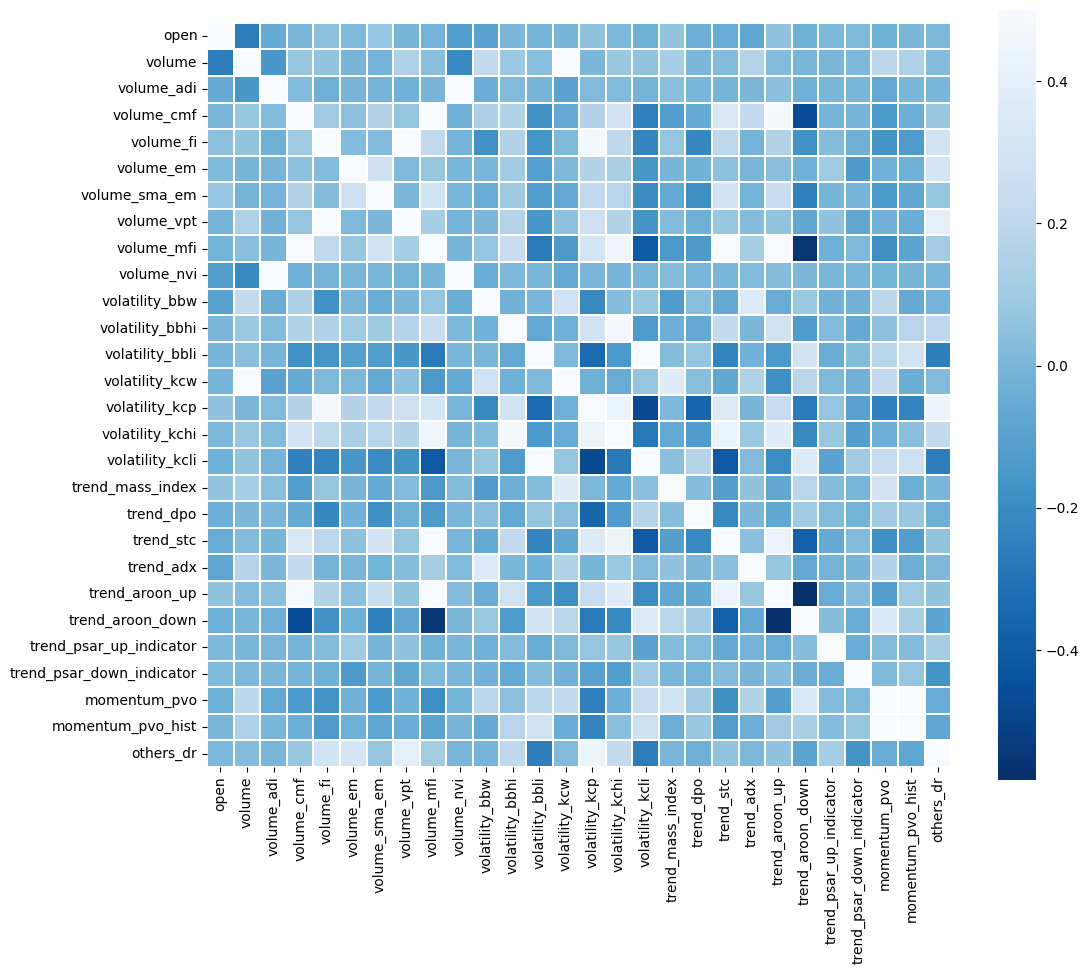

In [17]:
#Finding correlation of reamining features
plt.figure(figsize=(12,10))
cor=X_1.corr(numeric_only=True)
sns.heatmap(cor, cbar = True, vmax=.5, square=True, linewidths=.2, cmap="Blues_r")

In [18]:
cor

,open,volume,volume_adi,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_mfi,volume_nvi,...,trend_dpo,trend_stc,trend_adx,trend_aroon_up,trend_aroon_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_pvo,momentum_pvo_hist,others_dr
open,1.000000,-0.262325,-0.055334,0.005115,0.043618,0.011893,0.064492,-0.005844,-0.016769,-0.120240,...,-0.034299,-0.053810,-0.080316,0.056838,-0.029505,0.007244,0.012917,-0.031842,0.003590,0.008360
volume,-0.262325,1.000000,-0.147945,0.073845,0.061922,-0.003887,-0.015279,0.144899,0.037944,-0.207249,...,0.003762,0.020088,0.172997,0.019997,-0.001059,-0.000329,0.009248,0.192905,0.145574,0.023995
volume_adi,-0.055334,-0.147945,1.000000,0.018061,-0.031675,-0.003966,-0.014766,-0.021629,-0.005874,0.537926,...,-0.000198,-0.007418,0.001308,0.042262,-0.028978,-0.002640,-0.001955,-0.067439,-0.000970,0.000876
volume_cmf,0.005115,0.073845,0.018061,1.000000,0.099498,0.049928,0.167471,0.069630,0.497832,-0.027704,...,-0.054336,0.333019,0.214250,0.482617,-0.466306,-0.013364,-0.003356,-0.145090,-0.037669,0.078164
volume_fi,0.043618,0.061922,-0.031675,0.099498,1.000000,0.018209,0.026906,0.496660,0.208867,-0.014588,...,-0.219182,0.195772,-0.012802,0.159003,-0.178540,0.024281,-0.032676,-0.169411,-0.133653,0.296529
volume_em,0.011893,-0.003887,-0.003966,0.049928,0.018209,1.000000,0.275224,0.012720,0.074767,0.000653,...,-0.020904,0.049281,-0.001818,0.038849,-0.030180,0.102150,-0.134694,-0.021751,-0.028897,0.306935
volume_sma_em,0.064492,-0.015279,-0.014766,0.167471,0.026906,0.275224,1.000000,0.004450,0.290510,-0.000384,...,-0.187030,0.299969,-0.016080,0.241954,-0.244686,-0.008682,-0.003370,-0.143011,-0.081429,0.069540
volume_vpt,-0.005844,0.144899,-0.021629,0.069630,0.496660,0.012720,0.004450,1.000000,0.120679,-0.015300,...,-0.028884,0.073317,0.026248,0.061366,-0.074717,0.058378,-0.077106,-0.023755,-0.043980,0.389566
volume_mfi,-0.016769,0.037944,-0.005874,0.497832,0.208867,0.074767,0.290510,0.120679,1.000000,-0.010352,...,-0.138056,0.620760,0.127258,0.572912,-0.556633,-0.030026,0.009713,-0.189784,-0.090816,0.110565
volume_nvi,-0.120240,-0.207249,0.537926,-0.027704,-0.014588,0.000653,-0.000384,-0.015300,-0.010352,1.000000,...,-0.002694,0.000426,0.017080,0.029788,0.001545,0.000162,-0.000062,-0.018150,-0.004504,-0.001462


In [19]:
data_all_fs = pd.concat([X_1, y], axis=1)

In [20]:
#Separating data on a company level 
SP_Global = data_all_fs[data_all_fs.ticker == 'SPGI']

#Shifting the TA indicators to reflect the lagged effect of the technical indicators 
X_SP_raw = SP_Global.drop(['close','ticker'], axis=1).shift(20)
X_SP = X_SP_raw.drop(X_SP_raw.index[range(20)])
#Dependent variable will be closing price
y_SP_raw = SP_Global.filter(['close'])
y_SP = y_SP_raw.drop(y_SP_raw.index[range(20)])
SP = pd.concat([X_SP, y_SP], axis=1)
#Splitting data to training, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X_SP, y_SP, test_size=0.2)

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8)


#Dataset for future prediction of 1 month
X_pred = SP_Global.tail(20).drop(['close','ticker'], axis=1)

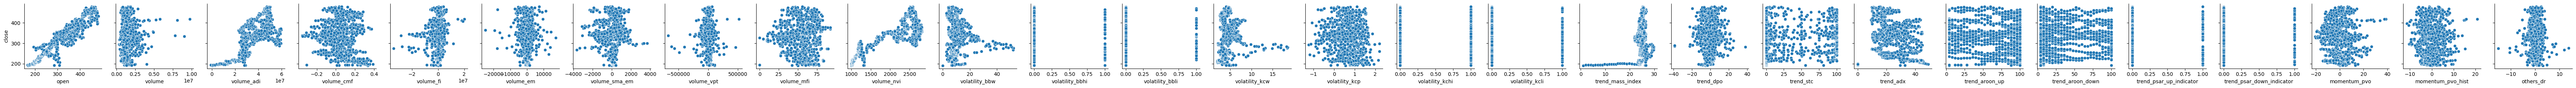

In [21]:
#Correlation between Lagged technical indicators and closing price 
sns.pairplot(SP, y_vars=['close'], x_vars=X_SP)
sns.despine()
plt.tight_layout()
plt.show()

In [22]:
# Using Random Forest Regressor to derive the most relevant features
def feat_imp(model):
    model.fit(X_train, y_train)
    best_features = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['Importance_Value']).sort_values(by = ['Importance_Value'], ascending=False).head()

#Best features plot
    ax0 = sns.barplot(x = best_features.index, y = 'Importance_Value', data=best_features)
    ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 12, rotation=40, ha="right")
    plt.title('Variable Importance')
    plt.show()
    best_features.index

0.8980241313891542
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
[ 8.77485132e-01  9.49364921e-07 -8.68165674e-07  0.00000000e+00
  1.79856998e-07 -5.93212734e-05 -6.96215159e-03 -1.30085080e-07
  3.66275802e-01  1.69416193e-02  7.34281859e-01 -0.00000000e+00
 -0.00000000e+00  6.68406317e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.41871920e-01 -1.33038225e-02  5.39036330e-02
 -1.54903827e-02 -6.67302110e-02 -8.96020153e-02  0.00000000e+00
 -0.00000000e+00 -8.57737085e-04 -1.61465394e-01  8.32563238e-01]
Alpha = 1e-05
Training accuracy: 0.8977618027483999
Validation accuracy: 0.8962577385917414
***
Alpha = 0.0001
Training accuracy: 0.8977623482627767
Validation accuracy: 0.8962598832682507
***
Alpha = 0.001
Training accuracy: 0.8977677654994326
Validation accuracy: 0.8962812890204694
***
Alpha = 0.01
Traini

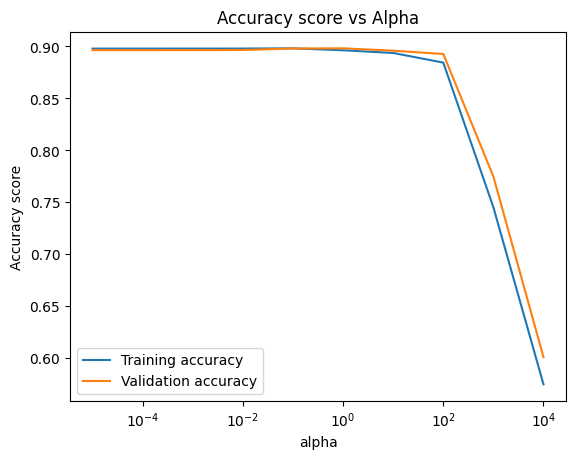

In [23]:
#2. Model 1. Lasso regression
model1 = Lasso(alpha=1, max_iter=100).fit(X_train2, y_train2)
print(model1.score(X_val, y_val))
print(model1.get_params(deep=True))
print(model1.coef_)

#Cross validation
Training_accuracy=[]
Validation_accuracy=[]
alpha = (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)
for a in alpha:
    model1_ = Lasso(alpha=a).fit(X_train2, y_train2)
    y_pred = model1_.predict(X_val)
    Training_accuracy.append((model1_.score(X_train, y_train)))
    Validation_accuracy.append((model1_.score(X_val, y_val)))
    print('Alpha =', a)
    print('Training accuracy:', (model1_.score(X_train, y_train)))
    print('Validation accuracy:', (model1_.score(X_val, y_val)))
    print('***')
#Plot accuracy level vs alpha
    ax = plt.gca()
ax.plot(alpha,  Training_accuracy, label='Training accuracy')
ax.plot(alpha, Validation_accuracy, label='Validation accuracy')          
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs Alpha')
plt.legend()
plt.axis("tight")
plt.show()

In [24]:
#Model 1 tuned
model1_tuned = Lasso(alpha=1, max_iter=100)
model1_tuned.fit(X_train2, y_train2)
print('Tuned model 1 score on validation set:', model1_tuned.score(X_val, y_val))

Tuned model 1 score on validation set: 0.8980241313891542


In [25]:
#Model 1. Coefficients of the variables as indicators of feature importance 
print(model1_tuned.coef_)

[ 8.77485132e-01  9.49364921e-07 -8.68165674e-07  0.00000000e+00
  1.79856998e-07 -5.93212734e-05 -6.96215159e-03 -1.30085080e-07
  3.66275802e-01  1.69416193e-02  7.34281859e-01 -0.00000000e+00
 -0.00000000e+00  6.68406317e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.41871920e-01 -1.33038225e-02  5.39036330e-02
 -1.54903827e-02 -6.67302110e-02 -8.96020153e-02  0.00000000e+00
 -0.00000000e+00 -8.57737085e-04 -1.61465394e-01  8.32563238e-01]


In [26]:
#Model 2. Random Forest Regression
 
#Random parameter grid search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

model2 = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [27]:
#Model 2 tuned
model2_tuned = RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 100, bootstrap=True)
model2_tuned.fit(X_train2, y_train2)
print(model2_tuned.score(X_val, y_val))

0.9798295151508243


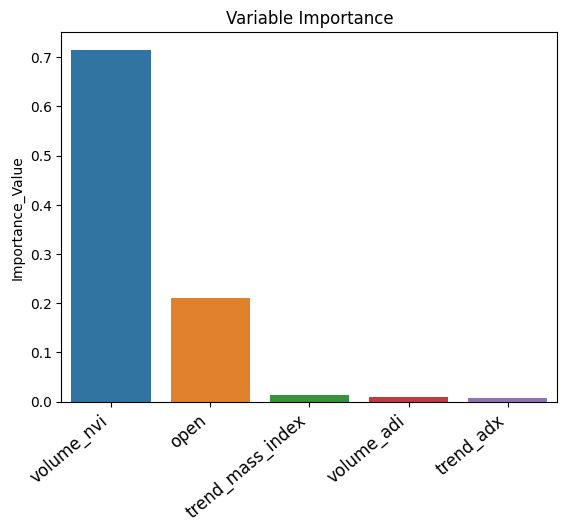

In [28]:
#Model 2. Feature importance
feat_imp(model2_tuned)

In [29]:
#Model 3. Gradient Boosting
#Cross validation using grid search
model3 = GradientBoostingRegressor().fit(X_train2, y_train2)
print(model3.score(X_val, y_val))

param_grid = {
    'learning_rate': [0.01, 0.1, 1, 10],
    'max_depth': [1, 3, 5, 7, 9, 11],
    'n_estimators': [5, 100, 300, 1000]
}
grid_search = GridSearchCV(estimator = model3, param_grid = param_grid, cv = 3, verbose = 2)
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)

0.9766301120257617
Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.01, max_depth=1, n_estimators=1000; total time=   0.5s
[CV] END .learning_rate=0.01, max_depth=1, n_estimators=1000; total time=   0.5s
[CV] END .learning_rate=0.01

In [30]:
#Model 3 tuned
model3_tuned = GradientBoostingRegressor(learning_rate= 0.1, max_depth=5, n_estimators= 100)
model3_tuned.fit(X_train2, y_train2)
print(model3_tuned.score(X_val, y_val))

0.9843957578729189


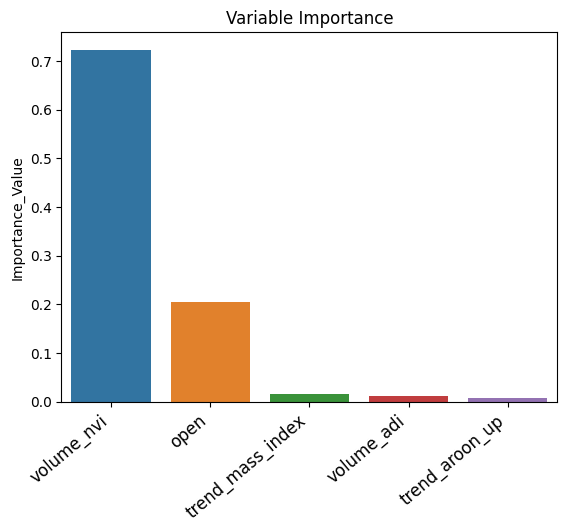

In [31]:
#Model 3. Feature importance
feat_imp(model3_tuned)

In [32]:
#Model 4. Elastic Net
#Cross validation using grid search
model4 = ElasticNetCV().fit(X_train2, y_train2)
print(model4.score(X_val, y_val))

param_grid = {
    'l1_ratio' : [0, 0.2, 0.4, 0.6, .9, .99, 1]  
}
grid_search = GridSearchCV(estimator = model4, param_grid = param_grid, cv = 3, verbose = 2)
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)

0.5642591391952961
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .........................................l1_ratio=0; total time=   0.0s
[CV] END .........................................l1_ratio=0; total time=   0.0s
[CV] END .........................................l1_ratio=0; total time=   0.0s
[CV] END .......................................l1_ratio=0.2; total time=   0.0s
[CV] END .......................................l1_ratio=0.2; total time=   0.0s
[CV] END .......................................l1_ratio=0.2; total time=   0.0s
[CV] END .......................................l1_ratio=0.4; total time=   0.0s
[CV] END .......................................l1_ratio=0.4; total time=   0.0s
[CV] END .......................................l1_ratio=0.4; total time=   0.0s
[CV] END .......................................l1_ratio=0.6; total time=   0.0s
[CV] END .......................................l1_ratio=0.6; total time=   0.0s
[CV] END .....................

In [33]:
#Model 4 tuned
model4_tuned = ElasticNet(l1_ratio = 0.2)
model4_tuned.fit(X_train2, y_train2)
print(model4_tuned.score(X_val, y_val))

0.8984364004790681


In [34]:
#Model 4. Feature importance
model4_tuned.coef_

array([ 8.77771201e-01,  1.17869789e-06, -8.72923247e-07,  0.00000000e+00,
        1.70982583e-07, -8.73927201e-05, -7.03820244e-03, -2.83606902e-07,
        3.68898503e-01,  1.68715123e-02,  7.18085733e-01, -0.00000000e+00,
       -3.11959196e-01,  7.56245502e-01,  8.82423671e-02, -4.04474166e-01,
       -3.11101119e-01,  8.04258353e-01, -3.58274945e-02,  5.21989069e-02,
       -2.70458255e-02, -6.51312292e-02, -8.91238960e-02,  1.62148670e-01,
       -0.00000000e+00, -2.26382193e-02, -1.91704813e-01,  8.78826761e-01])

In [35]:
#Creating the tuned models and testing
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Lasso': model1_tuned,
        'Random Forest Regressor': model2_tuned,
        'Gradient Boosting Regressor': model3_tuned,
        'Elastic Net CV': model4_tuned
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train.values.ravel())
        y_pred=clf.predict(X_test)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
        print(f'MSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
        print()
    
        y_pred = pd.DataFrame(y_pred, columns=['close'], index=y_test.index)
        comparison = pd.concat([y_test, y_pred], axis=1)
        
#Plot of actual and predicted price
        plt.plot(y_test, 'ro', label='Actual price', markersize=4, color='c')
        plt.plot(y_pred, 'bo', label='Predicted price', markersize=4, color='blue')
        plt.ylabel('USD')
        plt.title(name, fontsize=10)
        plt.legend()
        plt.ylim(0, 600)
        plt.show()


S&P GLobal:
Lasso
R2: 0.91
MAE: 18.03
MSE: 22.88



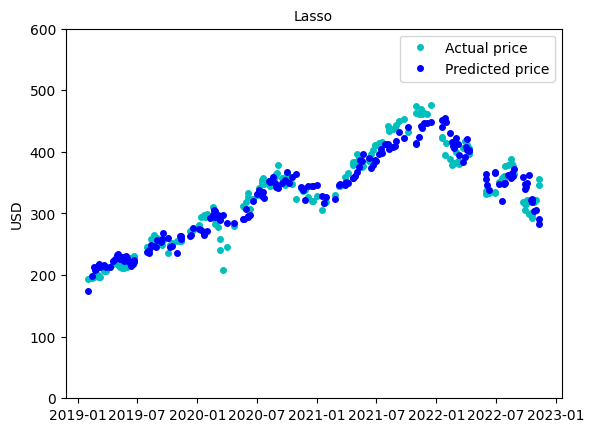

Random Forest Regressor
R2: 0.99
MAE: 5.64
MSE: 8.23



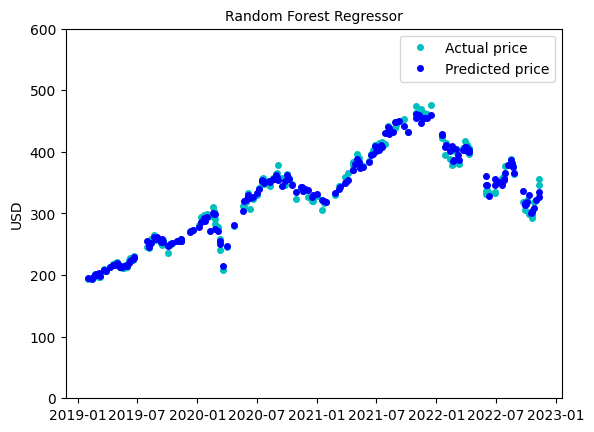

Gradient Boosting Regressor
R2: 0.99
MAE: 5.75
MSE: 7.92



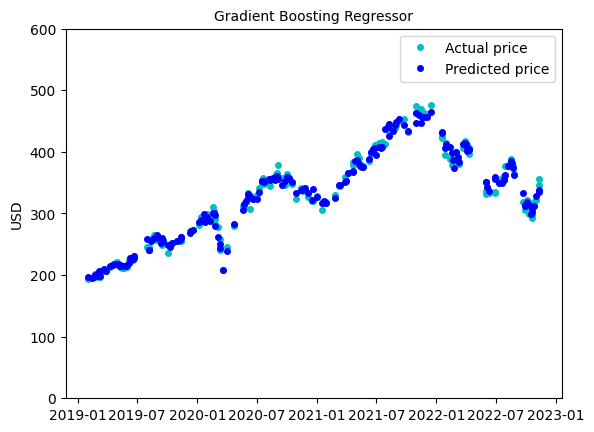

Elastic Net CV
R2: 0.91
MAE: 18.05
MSE: 22.89



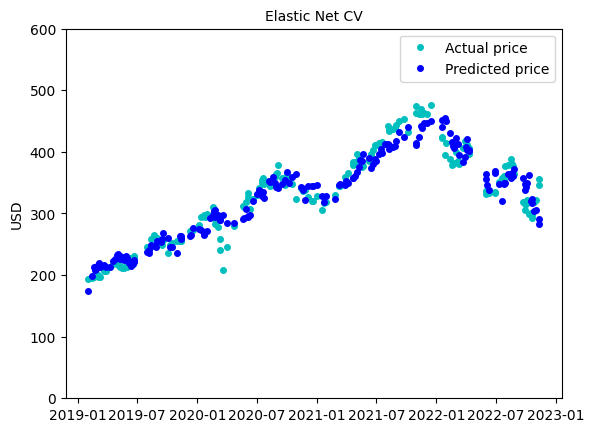

In [36]:
#Testing te model with S&P Global
print('S&P GLobal:')
regression(X_train, X_test, y_train, y_test)

In [37]:
#Prediction function definition
def prediction(name, X_train, y_train, X_pred):
    
    model = model3_tuned
    model.fit(X_train, y_train.values.ravel())
    target = model.predict(X_pred)
    
    last_date=data_all.iloc[-1].name
    modified_date = last_date + dt.timedelta(days=1)
    new_date = pd.date_range(modified_date,periods=20,freq='D')

# assign prediction to newly defined index
    prediction_1m = pd.DataFrame(target, columns=['close'], index=new_date)

# combine historical price and predicted price
    SP = pd.concat([y_SP, prediction_1m.dropna()])
    
    plt.figure(figsize=(10,5))
    plt.plot(SP[['close']]['2022':], label='Actual Price')
    plt.plot(SP[-20:], label='Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price in USD')
    plt.title('Prediction')
    plt.legend()
    plt.show()

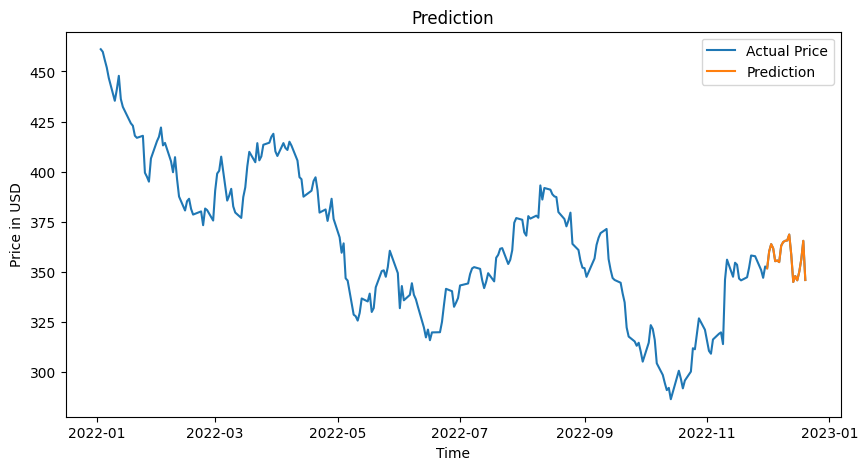

In [38]:
#Prediction of S&P Global stock price 
prediction('S&P Global', X_train, y_train, X_pred)

In [39]:
#Generalized model for different companies
def regression2(X_train, X_test, y_train, y_test):
    Regressor = {
        'Lasso': model1_tuned,
        'Random Forest Regressor': model2_tuned,
        'Gradient Boosting Regressor': model3_tuned,
        'Elastic Net CV': model4_tuned
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train.values.ravel())
        y_pred=clf.predict(X_test)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
        print(f'MSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
        print()
    
        y_pred = pd.DataFrame(y_pred, columns=['close'], index=y_test.index)
        comparison = pd.concat([y_test, y_pred], axis=1)

In [40]:
#Separating data on a company level 
for i in ticker_list:
    data = data_all_fs[data_all_fs.ticker == i]

#Shifting the TA indicators to reflect the lagged effect of the technical indicators 
    X_raw = data.drop(['close','ticker'], axis=1).shift(20)
    X_new = X_raw.drop(X_raw.index[range(20)])
#Dependent variable will be closing price
    y_raw = data.filter(['close'])
    y_new = y_raw.drop(y_raw.index[range(20)])
    data_new = pd.concat([X_new, y_new], axis=1)
#Splitting data to training and testing set per 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)
    X_pred = data.tail(20).drop(['close','ticker'], axis=1)
        
    print(i)
    regression2(X_train, X_test, y_train, y_test)
    print('-----------------------------------------')

SPGI
Lasso
R2: 0.87
MAE: 19.05
MSE: 25.47

Random Forest Regressor
R2: 0.98
MAE: 6.95
MSE: 9.91

Gradient Boosting Regressor
R2: 0.98
MAE: 6.40
MSE: 9.17

Elastic Net CV
R2: 0.87
MAE: 19.03
MSE: 25.43

-----------------------------------------
VZ
Lasso
R2: 0.83
MAE: 1.93
MSE: 2.43

Random Forest Regressor
R2: 0.97
MAE: 0.67
MSE: 0.93

Gradient Boosting Regressor
R2: 0.98
MAE: 0.63
MSE: 0.84

Elastic Net CV
R2: 0.83
MAE: 1.94
MSE: 2.41

-----------------------------------------
TSLA
Lasso
R2: 0.94
MAE: 22.02
MSE: 29.41

Random Forest Regressor
R2: 0.98
MAE: 8.60
MSE: 15.29

Gradient Boosting Regressor
R2: 0.99
MAE: 8.04
MSE: 13.60

Elastic Net CV
R2: 0.94
MAE: 22.00
MSE: 29.36

-----------------------------------------
AAPL
Lasso
R2: 0.95
MAE: 7.90
MSE: 10.39

Random Forest Regressor
R2: 0.99
MAE: 2.50
MSE: 4.01

Gradient Boosting Regressor
R2: 0.99
MAE: 2.52
MSE: 3.76

Elastic Net CV
R2: 0.95
MAE: 7.87
MSE: 10.33

-----------------------------------------
XOM
Lasso
R2: 0.89
MAE: 4.04
M

In [41]:
#General prediction function
def prediction(name, X_train, y_train, X_pred):
    
    model = model3_tuned
    model.fit(X_train, y_train.values.ravel())
    target = model.predict(X_pred)
    
    last_date=data_all.iloc[-1].name
    modified_date = last_date + dt.timedelta(days=1)
    new_date = pd.date_range(modified_date,periods=20,freq='D')

# assign prediction to newly defined index
    prediction_1m = pd.DataFrame(target, columns=['close'], index=new_date)

# combine historical price and predicted price
    y_all = pd.concat([y_new, prediction_1m.dropna()])
    
    plt.figure(figsize=(10,5))
    plt.plot(y_all[['close']]['2022':], label='Actual Price')
    plt.plot(y_all[-20:], label='Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price in USD')
    plt.title('Prediction')
    plt.legend()
    plt.show()

SPGI


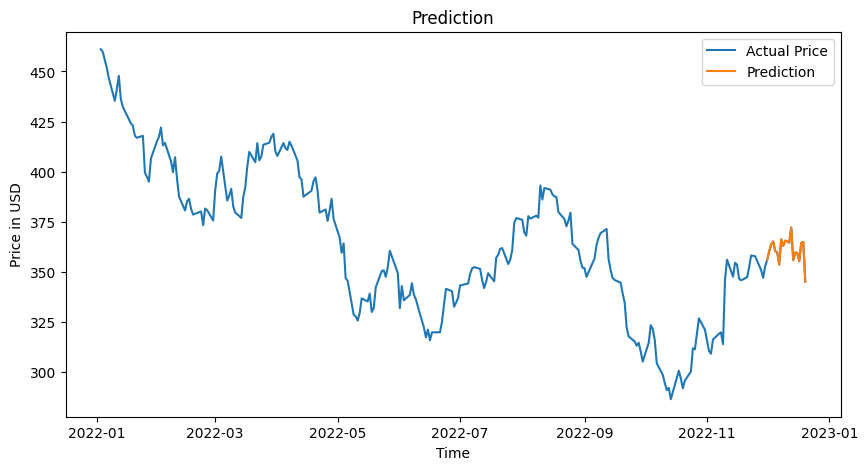

VZ


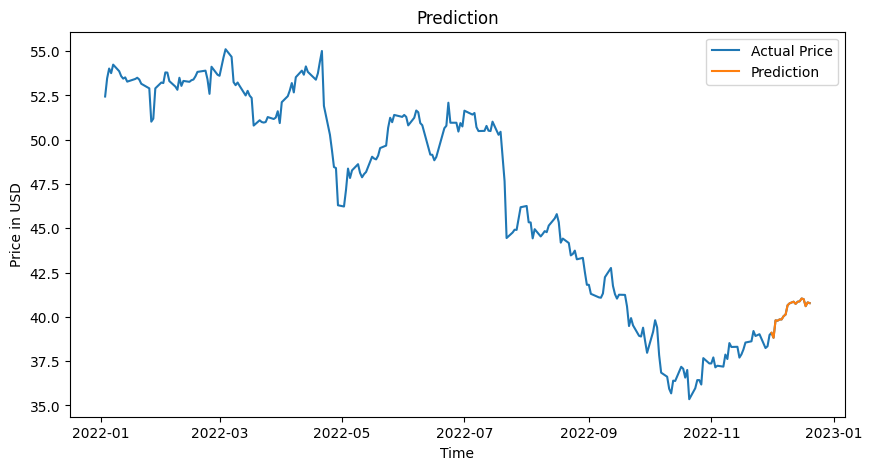

TSLA


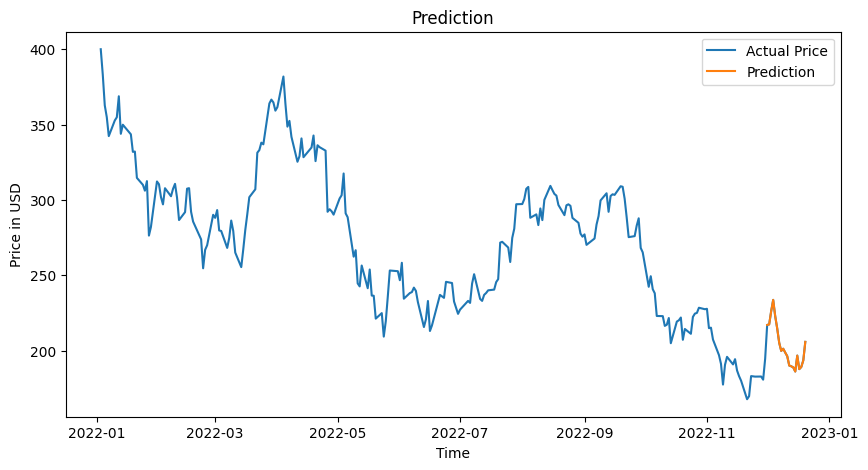

AAPL


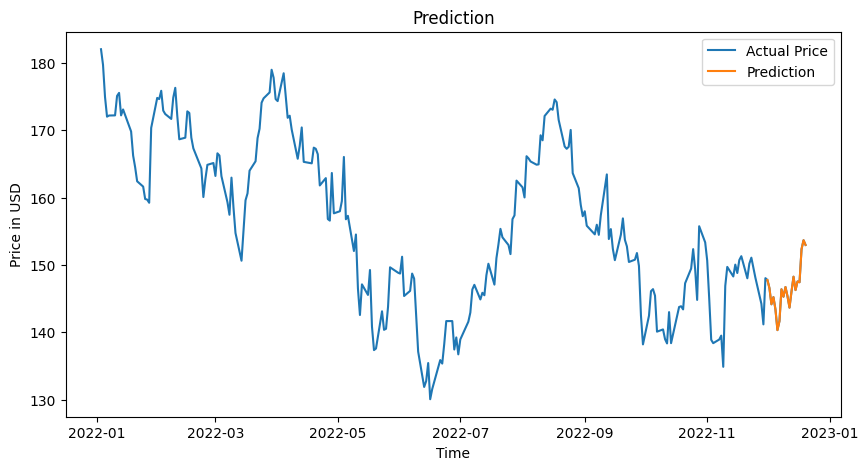

XOM


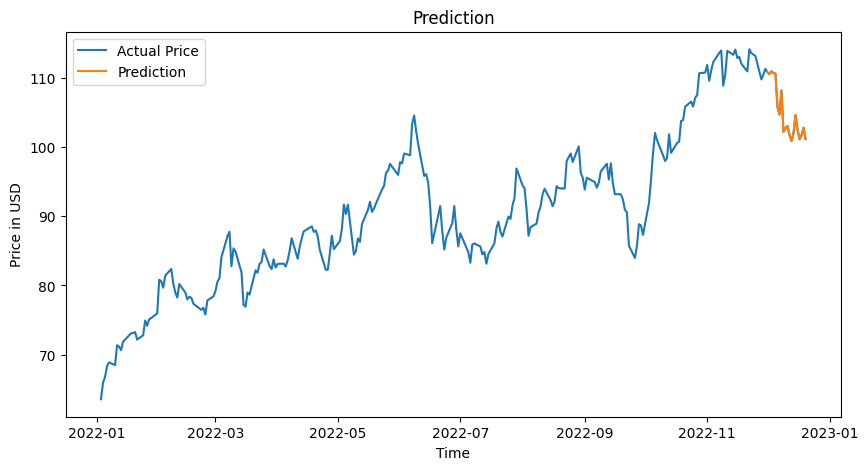

UNH


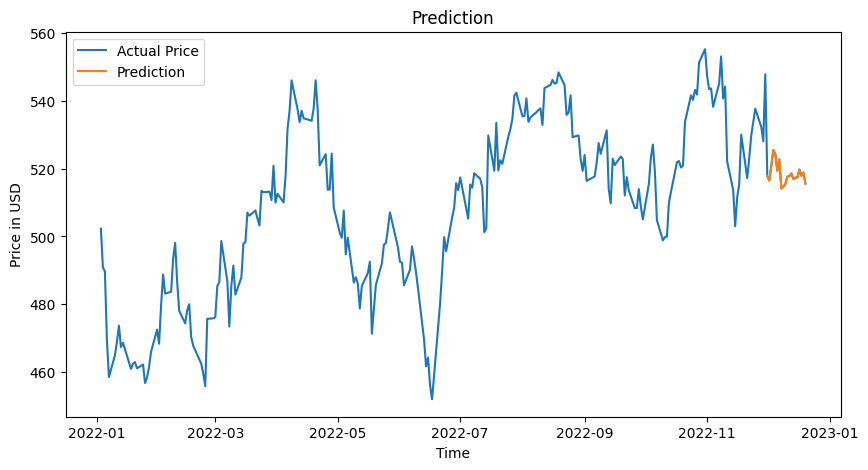

WM


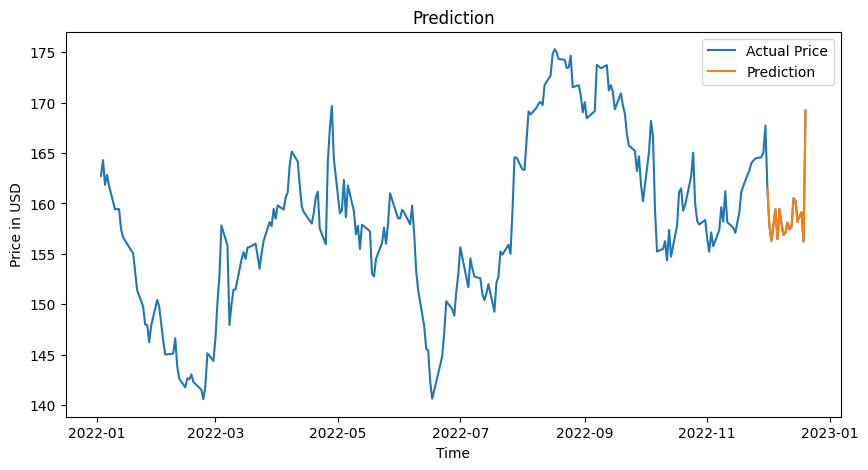

BRK-B


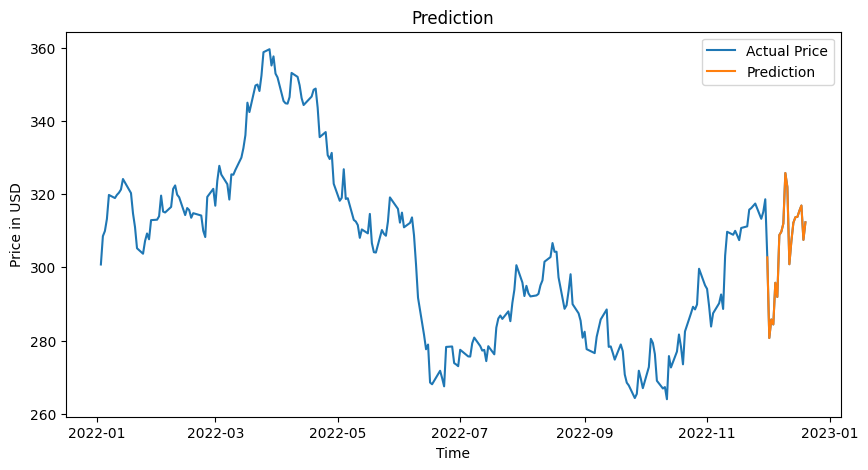

AMZN


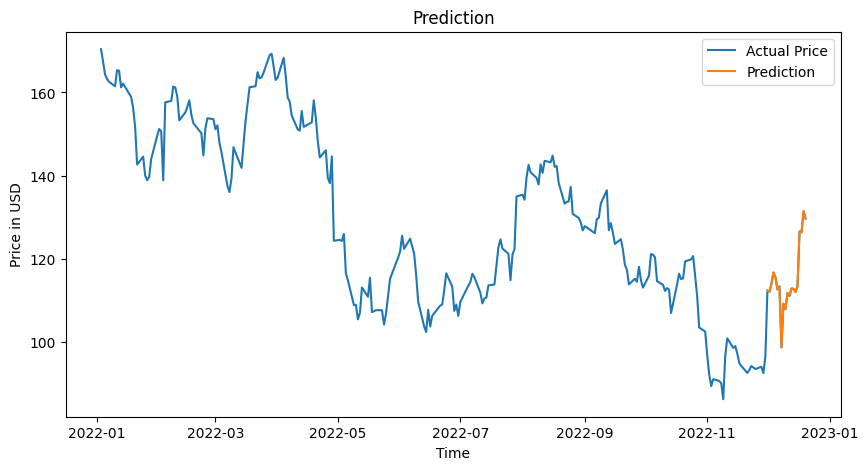

UPS


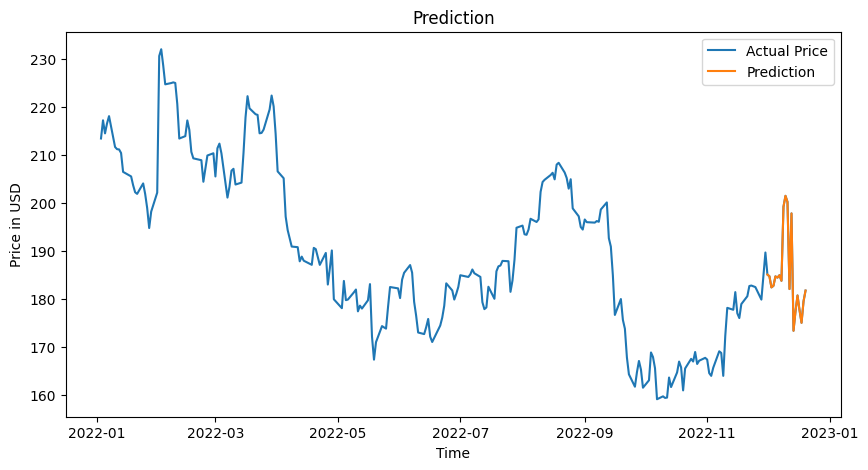

NEE


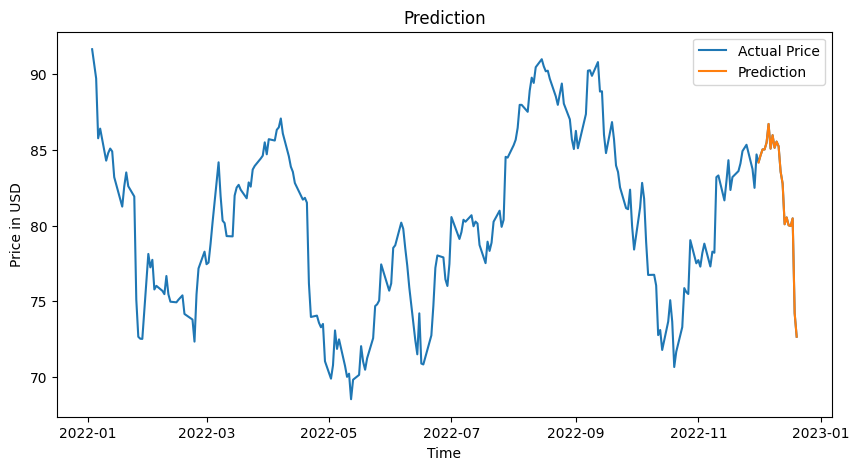

In [42]:
#General model predicting stock price of individual companies
for i in ticker_list:
    data = data_all_fs[data_all_fs.ticker == i]

#Shifting the TA indicators to reflect the lagged effect of the technical indicators 
    X_raw = data.drop(['close','ticker'], axis=1).shift(20)
    X_new = X_raw.drop(X_raw.index[range(20)])
#Dependent variable will be closing price
    y_raw = data.filter(['close'])
    y_new = y_raw.drop(y_raw.index[range(20)])
    data_new = pd.concat([X_new, y_new], axis=1)
#Splitting data to training and testing set per 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)
    X_pred = data.tail(20).drop(['close','ticker'], axis=1)
        
    print(i)
    prediction(i, X_train, y_train, X_pred)